This project will draw on statistics to determine the best markets in which to advertise e-learning tools. To do so, I will explore this data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp offers free courses on web development. Because many new coders are drawn to this platform, this survey is ideal to see where users spend the most money on e-learning. From there, I'll be able to identify populations to target. 

This data set is publically available on github:
https://github.com/erictleung/2017-new-coder-survey
Each column describes a characteristic of new coders, which span age, college major, and learning method.

In [90]:
import pandas as pd
import numpy as np
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
survey.shape
survey.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
pd.Series(survey.columns)[61:]

61          JobInterestMobile
62           JobInterestOther
63        JobInterestProjMngr
64          JobInterestQAEngr
65              JobInterestUX
66                    JobPref
67           JobRelocateYesNo
68            JobRoleInterest
69               JobWherePref
70             LanguageAtHome
71              MaritalStatus
72           MoneyForLearning
73          MonthsProgramming
74                  NetworkID
75               Part1EndTime
76             Part1StartTime
77               Part2EndTime
78             Part2StartTime
79           PodcastChangeLog
80          PodcastCodeNewbie
81             PodcastCodePen
82              PodcastDevTea
83              PodcastDotNET
84         PodcastGiantRobots
85               PodcastJSAir
86            PodcastJSJabber
87                PodcastNone
88               PodcastOther
89       PodcastProgThrowdown
90          PodcastRubyRogues
                ...          
106               ResourceMDN
107          ResourceOdinProj
108       

To ensure a robust analysis, I'll need to know more about the population of new coders interested in the product I'm looking to sell. That is, where do these folks live? What locations do they most densely populate? How much do they spend on e-learning?

It will help to first break out what jobs these folks are interested in. To do so, I'll hone in on the 'JobRoleInterest' column. This will give me insight into what sort of courses new coders will be most likely to take on. 

In [92]:
survey['JobRoleInterest'][:5]
survey['JobRoleInterest'].isna().value_counts()
no_nulls = survey['JobRoleInterest'].dropna()
no_nulls.shape

(6992,)

In [93]:
survey['JobRoleInterest'].value_counts(normalize=True)

Full-Stack Web Developer                                                                                                                                                                      0.117706
  Front-End Web Developer                                                                                                                                                                     0.064359
  Data Scientist                                                                                                                                                                              0.021739
Back-End Web Developer                                                                                                                                                                        0.020309
  Mobile Developer                                                                                                                                                                            0.016733
Game 

(0, 12)

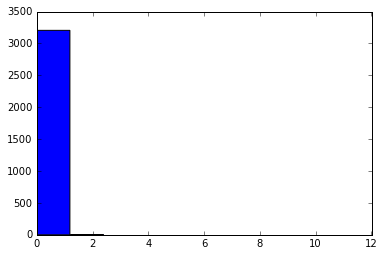

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
table = survey['JobRoleInterest'].dropna().value_counts(normalize=True)*100
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(table)
ax.set_xlim(0,12)
#ax.set_ylim(0,100)
#ax.set_xticks(ticks=np.arange(0,12,.5))

It appears a majority of our columns contain more than one response. Let's filter our distribution to include multiple response columns.

(0, 2)

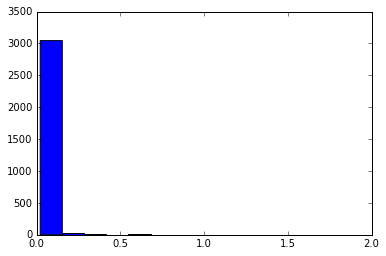

In [95]:
multi = []

for object in survey['JobRoleInterest']:
    object = str(object)
    if object.find(',') != -1 & object.find('nan') == -1:
        multi.append(object)

multi_interest = pd.Series(multi)
multi_table = multi_interest.value_counts(normalize=True)*100
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(single_table)
ax.set_xlim(0,2)

Our new plot doesn't vary much from our first one, meaning most people have multiple career aspirations. This doesn't make for easy analysis if we want to truly determine which careers are most attractive to the most people. 

In order to simplify our analysis, let's assume the courses offered by this e-learning company are in web and mobile development, so we can narrow down are population of interest to folks interested in at least one of these subjects. To do so, I can filter my Interest column to rows that contain the word 'developer'. That will tell me who is interested in any sort of development.

In [96]:
developers = []

for object in survey['JobRoleInterest']:
    object = str(object)
    if "Developer" in object:
        developers.append(object)
        
developers = pd.Series(developers)
developers.count()
        

6225

It appears a majority of respondents (89%) are interested in web or mobile development!

Let's now figure out where our respondents live and how densely they populate each nation. We'll look at the CountryLive variable, and ensure that we exclude rows that didn't receive a response.

In [97]:
clean_survey = survey[survey['JobRoleInterest'].notnull()]
clean_survey['CountryLive'].value_counts()*100

United States of America         312500
India                             52800
United Kingdom                    31500
Canada                            26000
Poland                            13100
Brazil                            12900
Germany                           12500
Australia                         11200
Russia                            10200
Ukraine                            8900
Nigeria                            8400
Spain                              7700
France                             7500
Romania                            7100
Netherlands (Holland, Europe)      6500
Italy                              6200
Serbia                             5200
Philippines                        5200
Greece                             4600
Ireland                            4300
South Africa                       3900
Mexico                             3700
Turkey                             3600
Singapore                          3400
Hungary                            3400


Our respondents are overwhelmingly located in the United States, followed not so closely by India, the UK, and Canada. This makes sense as English is an official language in all of these countries, and this survey was written in English. While it may make the most sense to target our top two countries, we could also attempt to guage the likelihood of a particular country to respond to our ads. This could require looking at the hours a group spends learning, their employment status, whether they've already been to coding events, or how much they're willing to spend. For this analysis, let's focus on that last characteristic in our top four countries, as it most likely to predict profitability. 

In [98]:
#I'll start by creating a new column that describes how much money students spend
#per month in our target countries.

clean_survey['MonthsProgramming'].replace(0,1,inplace=True) #To avoid dividing by 0
clean_survey['Money Spent Per Month'] = clean_survey['MoneyForLearning'] / clean_survey['MonthsProgramming']
clean_survey[['MoneyForLearning','MonthsProgramming','Money Spent Per Month']]


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,MoneyForLearning,MonthsProgramming,Money Spent Per Month
1,80.0,6.0,13.333333
2,1000.0,5.0,200.000000
3,0.0,5.0,0.000000
4,0.0,24.0,0.000000
6,0.0,12.0,0.000000
9,100.0,18.0,5.555556
11,0.0,1.0,0.000000
13,NaN,NaN,NaN
14,NaN,9.0,NaN
15,0.0,1.0,0.000000


In [99]:
#Dropping all null values for our characteristics of interest.
clean_survey['Money Spent Per Month'] = clean_survey['Money Spent Per Month'].dropna()
clean_survey['CountryLive'] = clean_survey['CountryLive'].dropna()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [103]:
top_four = ((clean_survey['CountryLive'] == 'India') 
            | (clean_survey['CountryLive'] == 'United States of America') 
            | (clean_survey['CountryLive'] == 'United Kingdom')
           | (clean_survey['CountryLive'] == 'Canada'))

clean_survey[top_four][['CountryLive','Money Spent Per Month']].groupby('CountryLive').mean()

,Money Spent Per Month
CountryLive,
Canada,113.510961
India,135.100982
United Kingdom,45.534443
United States of America,227.997996


It looks like Americans spend the most, although it's unusual that the British are willing to spend less on average than folks in India, which is a lower GDP country. It could be that are sample is not representative, or that there are potential outliers skewing our data. 

Let's visualize the data to see if we can spot unusual trends.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


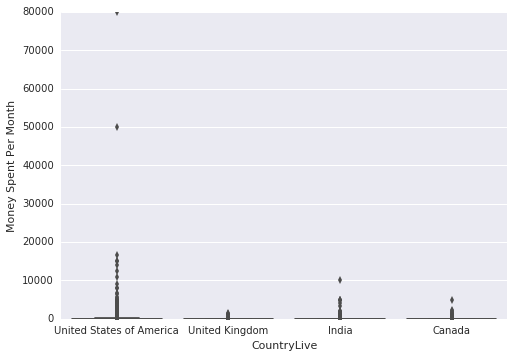

In [104]:
import seaborn as sns
sns.boxplot(y = 'Money Spent Per Month', x = 'CountryLive', data=clean_survey[top_four])

It appears there are two outliers in our US data, which we can eliminate with a filter, but there appears to be relatively less spread among the other countries. Let's eliminate outliers greater than 20k and see what our plot looks like.

In [107]:
no_outliers = clean_survey['Money Spent Per Month'] < 20000

In [110]:
clean_survey[top_four & no_outliers][['CountryLive','Money Spent Per Month']].groupby('CountryLive').mean()


,Money Spent Per Month
CountryLive,
Canada,113.510961
India,135.100982
United Kingdom,45.534443
United States of America,183.800110


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


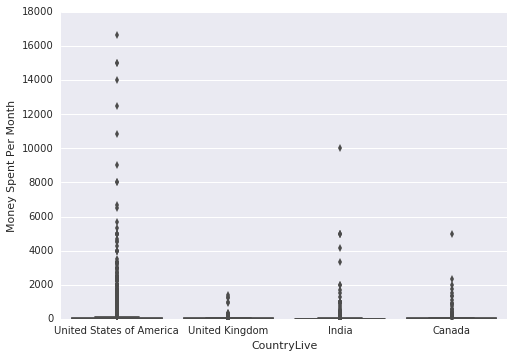

In [111]:
sns.boxplot(y = 'Money Spent Per Month', x = 'CountryLive', data=clean_survey[top_four & no_outliers])

It looks like we're still seeing some outliers. It's possible these folks attended bootcamps, which occur over a short time but can sensibly cost up to $6-15k per month. Let's see how much money boot campers spent on average per month.

In [129]:
clean_survey[['AttendedBootcamp','Money Spent Per Month']].groupby('AttendedBootcamp').mean()

,Money Spent Per Month
AttendedBootcamp,
0.0,118.350615
1.0,1202.462427


A lot more than average - let's filter out the folks who attended boot camps. 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


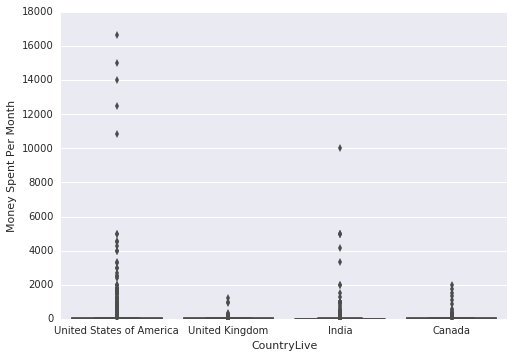

In [130]:
no_boot = clean_survey['AttendedBootcamp']==0
sns.boxplot(y = 'Money Spent Per Month', x = 'CountryLive', data=clean_survey[top_four & no_outliers & no_boot])

Again we're seeing some extreme outliers. Let's dive into what these folks look like.

In [144]:
outlier_filter = clean_survey['Money Spent Per Month'] > 6000
clean_survey[top_four & no_outliers & no_boot & outlier_filter]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money Spent Per Month
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000
17231,50.0,0.0,NaN,NaN,NaN,NaN,2.0,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000


Since there's nothing particularly eye-opening about these people, and because there are only 6 of them, we can assume they are aberrations and filter them out of our data set

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


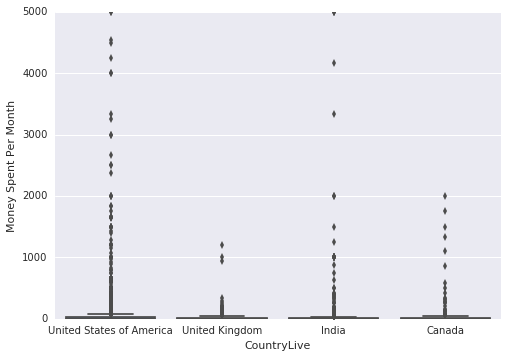

In [146]:
new_filter = clean_survey['Money Spent Per Month'] < 6000
sns.boxplot(y = 'Money Spent Per Month', x = 'CountryLive', data=clean_survey[top_four & new_filter & no_boot])

In [147]:
clean_survey[top_four & new_filter & no_boot][['CountryLive','Money Spent Per Month']].groupby('CountryLive').mean()

,Money Spent Per Month
CountryLive,
Canada,64.127841
India,111.589169
United Kingdom,34.468329
United States of America,76.350634


In [150]:
clean_survey[top_four & new_filter & no_boot]['CountryLive'].value_counts()

United States of America    2674
India                        453
United Kingdom               272
Canada                       230
Name: CountryLive, dtype: int64

Our final results show that Americans and Indians are willing to spend the most per month on average, and since these countries comprise a majority of respondents, we can safely pick them as our marketing domains. However, we will need to choose carefully how much money we want to spend in each country, as there is a clear disparity between potential customers (85% vs 15%). We may want to allocate more funds to our US market, or possibly launch an analysis on likelihood of responses in each country. This could entail diving deeper into our survey data, or gathering data from a separate source. 